In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score

In [2]:
games=pd.read_csv("AllLeagues.csv")
games=shuffle(games)

In [3]:
features=games.loc[:,"Wins":]


In [4]:
targets=games[["FTR"]]

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(features,targets,test_size=0.1)
#stratify=targets
X_train.shape,Y_train.shape

((35943, 32), (35943, 1))

In [6]:
Y_train=Y_train.values.ravel()
Y_train

array(['H', 'D', 'H', ..., 'H', 'D', 'H'], dtype=object)

In [7]:
%%time
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)

CPU times: user 11.7 s, sys: 37.1 ms, total: 11.8 s
Wall time: 11.8 s


RandomForestClassifier()

In [8]:
res=rf.predict(X_test)

In [9]:
f1_score(Y_test,res,average="micro")

0.6474712068102153

In [10]:
cm=confusion_matrix(Y_test,res,labels=["H", "D","A"])

In [11]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["H", "D","A"])

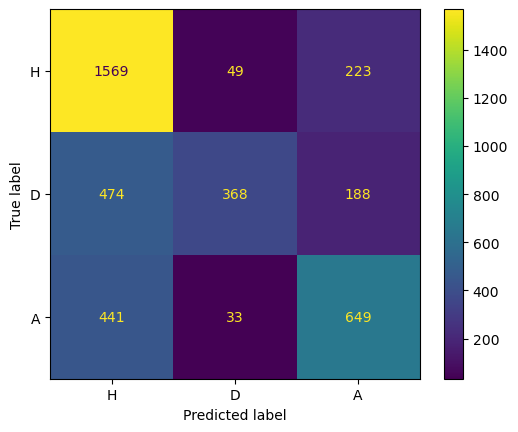

In [12]:
disp.plot()
plt.show()

In [13]:
"""depth_range=[a for a in range(1,50,10)]
depth_range.append(None)
samples_split=[a for a in range(1,1000,100)]
leaf_split=[a for a in range(1,1000,100)]
features_c=[a for a in range(1,33,4)]
estimators=[a for a in range(1,200,20)]
cv_params={"max_depth":depth_range,"min_samples_split":samples_split,"min_samples_leaf":leaf_split,"max_features":features_c,"n_estimators":estimators}"""

'depth_range=[a for a in range(1,50,10)]\ndepth_range.append(None)\nsamples_split=[a for a in range(1,1000,100)]\nleaf_split=[a for a in range(1,1000,100)]\nfeatures_c=[a for a in range(1,33,4)]\nestimators=[a for a in range(1,200,20)]\ncv_params={"max_depth":depth_range,"min_samples_split":samples_split,"min_samples_leaf":leaf_split,"max_features":features_c,"n_estimators":estimators}'

In [14]:
#scoring={"accuracy","f1_micro"}

In [15]:
"""%%time
rf=RandomForestClassifier()
rf_cv=GridSearchCV(rf,cv_params,scoring=scoring,cv=5,refit="f1_micro")"""

'%%time\nrf=RandomForestClassifier()\nrf_cv=GridSearchCV(rf,cv_params,scoring=scoring,cv=5,refit="f1_micro")'

In [16]:
#%%time
#rf_cv.fit(X_train,Y_train)